In [1]:
import tensorflow as tf
import numpy
import cv2
import os
import hashlib
import sys
import argparse
import io
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import PIL.Image


#This function converts Python objects of various types to Tensor objects. It accepts Tensor objects, numpy arrays, Python lists, and Python scalars. For example:


In [2]:
def convert_to_Tensor(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return arg

In [3]:
def read_img(f, pathTofile):
    height = None # Image height
    width = None # Image width
    filename = None # Filename of the image. Empty if image is not from file
    encoded_image_data = None # Encoded image bytes
    image_format = b'jpeg' # b'jpeg' or b'png'

    xmins = [] # List of normalized left x coordinates in bounding box (1 per box)
    xmaxs = [] # List of normalized right x coordinates in bounding box (1 per box)
    ymins = [] # List of normalized top y coordinates in bounding box (1 per box)
    ymaxs = [] # List of normalized bottom y coordinates in bounding box (1 per box)
    classes_text = [] # List of string class name of bounding box (1 per box)
    classes = [] # List of integer class id of bounding box (1 per box)
    poses = []
    truncated = []
    difficult_obj = []
    filename = f.readline().rstrip()
    print(filename)
    full_path=os.path.join(pathTofile, filename)
    print(full_path)
   # load the image
    image = PIL.Image.open(full_path)
    # convert image to numpy array
    data = numpy.asarray(image)
    print(type(data))
    #print("height is %d, width is %d, channel is %d" % (height, width, channel))
    width, height, channel=data.shape
    face_num = int(f.readline().rstrip())
    valid_face_num = 0
    #print("face_num:>>", face_num)
    for i in range(face_num):
        annot = f.readline().rstrip().split()
        # WIDER FACE DATASET CONTAINS SOME ANNOTATIONS WHAT EXCEEDS THE IMAGE BOUNDARY

        if(float(annot[2]) > 25.0):
            if(float(annot[3]) > 30.0):
                xmins.append( max(0.005, (float(annot[0]) / width) ) )
                ymins.append( max(0.005, (float(annot[1]) / height) ) )
                xmaxs.append( min(0.995, ((float(annot[0]) + float(annot[2])) / width) ) )
                ymaxs.append( min(0.995, ((float(annot[1]) + float(annot[3])) / height) ) )
                classes_text.append("face".encode('utf8'))
                classes.append(0)
                #print(xmins[-1], ymins[-1], xmaxs[-1], ymaxs[-1], classes_text[-1], classes[-1])
                valid_face_num += 1;
    bbox=[xmins, ymins, xmaxs, ymaxs]

    #print(bbox)
    #filename.split('/')[1]
    #jpeg = tf.image.decode_jpeg(encoded_jpg)
    #img = jpeg.numpy()
    return filename.split('/')[1],  data.shape, bbox, classes, classes_text


In [4]:
path="WIDER_val"
annotation="wider_face_val_annot.txt"

In [5]:
#count time of files
def countImagefiles(path):

    count=0
    for name in os.listdir(path):
            for file in os.listdir(path+"/"+name):
                if os.path.isfile(path+"/"+name+"/"+file):
                    count+=1
    return count

In [6]:

#in img_dir must be a folde "images"
numOfFiles=(countImagefiles(path+"/images"))
f=open(path+"/"+annotation)
imgs_names = []
bbox = []
classes=[]
classes_text=[]
img_shapes =[]
for img in range(numOfFiles):
    print("***********")
    filename,  img_shape, box, clss, cls_txt= read_img(f, path+"/images")
    imgs_names.append(filename)
    img_shapes.append(img_shape)
    bbox.append(box)
    classes.append(clss)
    classes_text.append(cls_txt)
print(len(imgs_names), len(img_shapes), len(bbox)) 
#print(imgs_names.index('9--Press_Conference/9_Press_Conference_Press_Conference_9_183.jpg'))
print(bbox)


***********
0--Parade/0_Parade_marchingband_1_465.jpg
WIDER_val/images/0--Parade/0_Parade_marchingband_1_465.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_628.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_628.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_marchingband_1_765.jpg
WIDER_val/images/0--Parade/0_Parade_marchingband_1_765.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_194.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_194.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_marchingband_1_379.jpg
WIDER_val/images/0--Parade/0_Parade_marchingband_1_379.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_814.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_814.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_470.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_470.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_marchingband_1_1045.jpg
WIDER_val/images/0--Parade/0_Parad

<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_906.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_906.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_marchingband_1_1004.jpg
WIDER_val/images/0--Parade/0_Parade_marchingband_1_1004.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_377.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_377.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_559.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_559.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_246.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_246.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_marchingband_1_552.jpg
WIDER_val/images/0--Parade/0_Parade_marchingband_1_552.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_12.jpg
WIDER_val/images/0--Parade/0_Parade_Parade_0_12.jpg
<class 'numpy.ndarray'>
***********
0--Parade/0_Parade_Parade_0_429.jpg
WIDER_val/images/0--Parade/0_

<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_674.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_674.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_2_430.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_2_430.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_2_822.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_2_822.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_2_944.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_2_944.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_

<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_619.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_619.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_848.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_848.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_2_36.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_2_36.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/10_People_Marching_People_Marching_2_236.jpg
WIDER_val/images/10--People_Marching/10_People_Marching_People_Marching_2_236.jpg
<class 'numpy.ndarray'>
***********
10--People_Marching/

<class 'numpy.ndarray'>
***********
11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_295.jpg
WIDER_val/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_295.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_912.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_912.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_536.jpg
WIDER_val/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_536.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_28.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_28.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_103.jpg
WIDER_val/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_103.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_354.jpg
WIDER_val/images/12--Gro

<class 'numpy.ndarray'>
***********
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_771.jpg
WIDER_val/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_771.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_855.jpg
WIDER_val/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_855.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_412.jpg
WIDER_val/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_412.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_522.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_522.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_759.jpg
WIDER_val/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_759.jpg
<class 'numpy.ndarray

<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_301.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_301.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_736.jpg
WIDER_val/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_736.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_315.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_315.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Large_Group_12_Group_Large_Group_12_43.jpg
WIDER_val/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_43.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_165.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_165.jpg
<class 'numpy.ndarray'>
***********
12--Group/12_Group_Group_12_Group_Group_12_354.jpg
WIDER_val/images/12--Group/12_Group_Group_12_Group_Group_12_354.jpg
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_940.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_On_Location_13_940.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_2_People_Visible_13_285.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_2_People_Visible_13_285.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_778.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_778.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_2_People_Visible_13_420.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_2_People_Visible_13_420.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_92.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_92.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_537.jpg
WIDER_val/images/13--Intervie

<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_135.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_135.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_718.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_718.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_2.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_2.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_2_People_Visible_13_155.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_2_People_Visible_13_155.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_15.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_15.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_433.jpg
WIDER_val/images/13--Interview/13_Interview_Intervi

<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_495.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_495.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_773.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_On_Location_13_773.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_513.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_On_Location_13_513.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_2_People_Visible_13_239.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_2_People_Visible_13_239.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_Sequences_13_33.jpg
WIDER_val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg
<class 'numpy.ndarray'>
***********
13--Interview/13_Interview_Interview_On_Location_13_33.jpg
WIDER_val/images/13--Interview/13_Interv

<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_781.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_781.jpg
<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_554.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_554.jpg
<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_382.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_382.jpg
<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_751.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_751.jpg
<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_313.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_313.jpg
<class 'numpy.ndarray'>
***********
15--Stock_Market/15_Stock_Market_Stock_Market_15_526.jpg
WIDER_val/images/15--Stock_Market/15_Stock_Market_Stock_Market_15_526.jp

<class 'numpy.ndarray'>
***********
16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_270.jpg
WIDER_val/images/16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_270.jpg
<class 'numpy.ndarray'>
***********
16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_311.jpg
WIDER_val/images/16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_311.jpg
<class 'numpy.ndarray'>
***********
16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_566.jpg
WIDER_val/images/16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_566.jpg
<class 'numpy.ndarray'>
***********
16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_73.jpg
WIDER_val/images/16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_73.jpg
<class 'numpy.ndarray'>
***********
16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_546.jpg
WIDER_val/images/16--Award_Ceremony/16_Award_Ceremony_Awards_Ceremony_16_546.jpg
<class 'numpy.ndarray'>
***********
17--Ceremony/17_Ceremony_Ceremony_17_1007.jpg
WIDER_val/image

<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_447.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_447.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_536.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_536.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_872.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_872.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_665.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_665.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_251.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_251.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_910.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_910.jpg
<class 'numpy.ndarray'>
***********
18--Concerts/18_Concerts_Concerts_18_1015.jpg
WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_1015.j

<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_905.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_905.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_219.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_219.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_46.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_46.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstrators_2_712.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstrators_2_712.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstrators_2_181.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstrators_2_181.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_131.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_131.jpg
<class 'numpy.

<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_114.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_114.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstrators_2_195.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstrators_2_195.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_22.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_22.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_450.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_450.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstrators_2_425.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstrators_2_425.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_345.jpg
WIDER_val/images/2--Demonstration/2_Demonstrati

<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_430.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_430.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_738.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_738.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_335.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_335.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_655.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_655.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_268.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_268.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_58.jpg
WIDER_val/images/2--Demons

<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_840.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_840.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_441.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_441.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_314.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_314.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstrators_2_488.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstrators_2_488.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_813.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_813.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_800.jpg
WIDER_val/image

<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Protesters_2_352.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_352.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_79.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_79.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_577.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_577.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_816.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_816.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_385.jpg
WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_385.jpg
<class 'numpy.ndarray'>
***********
2--Demonstration/2_Demonstration_Political_Rally_2_752.jpg
WIDER_val/images/2--Demons

<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_87.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_87.jpg
<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_799.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_799.jpg
<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_663.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_663.jpg
<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_272.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_272.jpg
<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_730.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_730.jpg
<class 'numpy.ndarray'>
***********
20--Family_Group/20_Family_Group_Family_Group_20_374.jpg
WIDER_val/images/20--Family_Group/20_Family_Group_Family_Group_20_374.jpg


<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_541.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_541.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_152.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_152.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_313.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_313.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_564.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_564.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_290.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_290.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_928.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_928.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_140.jpg
WIDER_val/images/22--Picnic/22_Picnic_Picnic_22_140.jpg
<class 'numpy.ndarray'>
***********
22--Picnic/22_Picnic_Picnic_22_732.jpg
WIDER_va

<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_702.jpg
WIDER_val/images/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_702.jpg
<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_67.jpg
WIDER_val/images/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_67.jpg
<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_254.jpg
WIDER_val/images/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_254.jpg
<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_264.jpg
WIDER_val/images/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_264.jpg
<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_281.jpg
WIDER_val/images/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_281.jpg
<class 'numpy.ndarray'>
***********
24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_95.jpg
WIDER_val

<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_986.jpg
WIDER_val/images/25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_986.jpg
<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_324.jpg
WIDER_val/images/25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_324.jpg
<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_585.jpg
WIDER_val/images/25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_585.jpg
<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_59.jpg
WIDER_val/images/25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_59.jpg
<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_747.jpg
WIDER_val/images/25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_747.jpg
<class 'numpy.ndarray'>
***********
25--Soldier_Patrol/25_Soldier_Patrol_Soldier_Patrol_25_325.jpg
WIDER_va

<class 'numpy.ndarray'>
***********
26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_9.jpg
WIDER_val/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_9.jpg
<class 'numpy.ndarray'>
***********
26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_619.jpg
WIDER_val/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_619.jpg
<class 'numpy.ndarray'>
***********
26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_610.jpg
WIDER_val/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_610.jpg
<class 'numpy.ndarray'>
***********
26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_245.jpg
WIDER_val/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_245.jpg
<class 'numpy.ndarray'>
***********
26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_31.jpg
WIDER_val/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_31.jpg
<class 'numpy.ndarray'>
***********
27--S

<class 'numpy.ndarray'>
***********
28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_2.jpg
WIDER_val/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_2.jpg
<class 'numpy.ndarray'>
***********
28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_267.jpg
WIDER_val/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_267.jpg
<class 'numpy.ndarray'>
***********
28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_723.jpg
WIDER_val/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_723.jpg
<class 'numpy.ndarray'>
***********
28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_507.jpg
WIDER_val/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_507.jpg
<class 'numpy.ndarray'>
***********
28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_697.jpg
WIDER_val/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_697.jpg
<class 'numpy.ndarray'>
***********
29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_221.jpg
WIDER_val/images/29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_221.jpg
<class 'numpy.ndarra

<class 'numpy.ndarray'>
***********
29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_506.jpg
WIDER_val/images/29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_506.jpg
<class 'numpy.ndarray'>
***********
29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_148.jpg
WIDER_val/images/29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_148.jpg
<class 'numpy.ndarray'>
***********
3--Riot/3_Riot_Riot_3_521.jpg
WIDER_val/images/3--Riot/3_Riot_Riot_3_521.jpg
<class 'numpy.ndarray'>
***********
3--Riot/3_Riot_Riot_3_604.jpg
WIDER_val/images/3--Riot/3_Riot_Riot_3_604.jpg
<class 'numpy.ndarray'>
***********
3--Riot/3_Riot_Riot_3_522.jpg
WIDER_val/images/3--Riot/3_Riot_Riot_3_522.jpg
<class 'numpy.ndarray'>
***********
3--Riot/3_Riot_Riot_3_415.jpg
WIDER_val/images/3--Riot/3_Riot_Riot_3_415.jpg
<class 'numpy.ndarray'>
***********
3--Riot/3_Riot_Riot_3_318.jpg
WIDER_val/images/3--Riot/3_Riot_Riot_3_318.jpg
<class 'numpy.nda

<class 'numpy.ndarray'>
***********
30--Surgeons/30_Surgeons_Surgeons_30_160.jpg
WIDER_val/images/30--Surgeons/30_Surgeons_Surgeons_30_160.jpg
<class 'numpy.ndarray'>
***********
30--Surgeons/30_Surgeons_Surgeons_30_911.jpg
WIDER_val/images/30--Surgeons/30_Surgeons_Surgeons_30_911.jpg
<class 'numpy.ndarray'>
***********
30--Surgeons/30_Surgeons_Surgeons_30_823.jpg
WIDER_val/images/30--Surgeons/30_Surgeons_Surgeons_30_823.jpg
<class 'numpy.ndarray'>
***********
30--Surgeons/30_Surgeons_Surgeons_30_865.jpg
WIDER_val/images/30--Surgeons/30_Surgeons_Surgeons_30_865.jpg
<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_932.jpg
WIDER_val/images/31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_932.jpg
<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_304.jpg
WIDER_val/images/31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_304.jpg
<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31

<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_720.jpg
WIDER_val/images/31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_720.jpg
<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_351.jpg
WIDER_val/images/31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_351.jpg
<class 'numpy.ndarray'>
***********
31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_915.jpg
WIDER_val/images/31--Waiter_Waitress/31_Waiter_Waitress_Waiter_Waitress_31_915.jpg
<class 'numpy.ndarray'>
***********
32--Worker_Laborer/32_Worker_Laborer_Worker_Laborer_32_812.jpg
WIDER_val/images/32--Worker_Laborer/32_Worker_Laborer_Worker_Laborer_32_812.jpg
<class 'numpy.ndarray'>
***********
32--Worker_Laborer/32_Worker_Laborer_Worker_Laborer_32_529.jpg
WIDER_val/images/32--Worker_Laborer/32_Worker_Laborer_Worker_Laborer_32_529.jpg
<class 'numpy.ndarray'>
***********
32--Worker_Laborer/32_Worker_Laborer_Worker_Laborer

<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_332.jpg
WIDER_val/images/33--Running/33_Running_Running_33_332.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_17.jpg
WIDER_val/images/33--Running/33_Running_Running_33_17.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_107.jpg
WIDER_val/images/33--Running/33_Running_Running_33_107.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_760.jpg
WIDER_val/images/33--Running/33_Running_Running_33_760.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_490.jpg
WIDER_val/images/33--Running/33_Running_Running_33_490.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_786.jpg
WIDER_val/images/33--Running/33_Running_Running_33_786.jpg
<class 'numpy.ndarray'>
***********
33--Running/33_Running_Running_33_119.jpg
WIDER_val/images/33--Running/33_Running_Running_33_119.jpg
<class 'numpy.ndarray'>
***********
33--Run

<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_612.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_612.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_937.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_937.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_290.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_290.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_199.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_199.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_495.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_495.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_197.jpg
WIDER_val/images/35--Basketball/35_Basketball_baske

<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_736.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_736.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_153.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_153.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_19.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_19.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_542.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_542.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_795.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_795.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_252.jpg
WIDER_val/images/35--Basketball/35_Basketball_playi

<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_478.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_478.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_Basketball_35_458.jpg
WIDER_val/images/35--Basketball/35_Basketball_Basketball_35_458.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_playingbasketball_35_818.jpg
WIDER_val/images/35--Basketball/35_Basketball_playingbasketball_35_818.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_Basketball_35_791.jpg
WIDER_val/images/35--Basketball/35_Basketball_Basketball_35_791.jpg
<class 'numpy.ndarray'>
***********
35--Basketball/35_Basketball_basketballgame_ball_35_201.jpg
WIDER_val/images/35--Basketball/35_Basketball_basketballgame_ball_35_201.jpg
<class 'numpy.ndarray'>
***********
36--Football/36_Football_americanfootball_ball_36_81.jpg
WIDER_val/images/36--Football/36_Football_americanfootball_ball_36_81.jpg
<class '

<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_Soccer_37_3.jpg
WIDER_val/images/37--Soccer/37_Soccer_Soccer_37_3.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_soccer_ball_37_720.jpg
WIDER_val/images/37--Soccer/37_Soccer_soccer_ball_37_720.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_soccer_ball_37_114.jpg
WIDER_val/images/37--Soccer/37_Soccer_soccer_ball_37_114.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_Soccer_37_170.jpg
WIDER_val/images/37--Soccer/37_Soccer_Soccer_37_170.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_soccer_ball_37_643.jpg
WIDER_val/images/37--Soccer/37_Soccer_soccer_ball_37_643.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_soccer_ball_37_32.jpg
WIDER_val/images/37--Soccer/37_Soccer_soccer_ball_37_32.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37_Soccer_Soccer_37_469.jpg
WIDER_val/images/37--Soccer/37_Soccer_Soccer_37_469.jpg
<class 'numpy.ndarray'>
***********
37--Soccer/37

<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_182.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_182.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_758.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_758.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_501.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_501.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_230.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_230.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_240.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_240.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_666.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_666.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_18.jpg
WIDER_val/images/38--Tennis/38_Tennis_Tennis_38_18.jpg
<class 'numpy.ndarray'>
***********
38--Tennis/38_Tennis_Tennis_38_128.jpg
WIDER_val/

<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_iceskiing_39_778.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_iceskiing_39_778.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_iceskiing_39_310.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_iceskiing_39_310.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_270.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_270.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_283.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_283.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_169.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_169.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Skating/39_Ice_Skating_iceskiing_39_359.jpg
WIDER_val/images/39--Ice_Skating/39_Ice_Skating_iceskiing_39_359.jpg
<class 'numpy.ndarray'>
***********
39--Ice_Sk

<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_460.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_460.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_521.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_521.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_57.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_57.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_1022.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_1022.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_161.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_161.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymnastics_40_980.jpg
WIDER_val/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_980.jpg
<class 'numpy.ndarray'>
***********
40--Gymnastics/40_Gymnastics_Gymna

<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_935.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_935.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_449.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_449.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_170.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_170.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimming_41_379.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimming_41_379.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimming_41_641.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimming_41_641.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_831.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_831.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_883.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_883.jpg
<class 'n

<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_55.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_55.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimming_41_380.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimming_41_380.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_927.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_927.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimming_41_699.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimming_41_699.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_507.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_507.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_755.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_755.jpg
<class 'numpy.ndarray'>
***********
41--Swimming/41_Swimming_Swimmer_41_440.jpg
WIDER_val/images/41--Swimming/41_Swimming_Swimmer_41_440.jpg
<class 'num

<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_325.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_325.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_133.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_133.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_234.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_234.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_227.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_227.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_341.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_341.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Canoe_43_1047.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Canoe_43_1047.jpg
<class 'numpy.ndarray'>
***********
43--Row_Boat/43_Row_Boat_Rowboat_43_1.jpg
WIDER_val/images/43--Row_Boat/43_Row_Boat_Rowboat_43_1.jpg
<class 'numpy.ndarray'>
***********
43-

<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_277.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_277.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_838.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_838.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_211.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_211.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_217.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_217.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_369.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_369.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Balloonist_45_416.jpg
WIDER_val/images/45--Balloonist/45_Balloonist_Balloonist_45_416.jpg
<class 'numpy.ndarray'>
***********
45--Balloonist/45_Balloonist_Ballo

<class 'numpy.ndarray'>
***********
47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_561.jpg
WIDER_val/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_561.jpg
<class 'numpy.ndarray'>
***********
47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_42.jpg
WIDER_val/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_42.jpg
<class 'numpy.ndarray'>
***********
47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_405.jpg
WIDER_val/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_405.jpg
<class 'numpy.ndarray'>
***********
47--Matador_Bullfighter/47_Matador_Bullfighter_Matador_Bullfighter_47_385.jpg
WIDER_val/images/47--Matador_Bullfighter/47_Matador_Bullfighter_Matador_Bullfighter_47_385.jpg
<class 'numpy.ndarray'>
***********
47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_812.jpg
WIDER_val/images/47--Matador_Bullfighter/47_Matador_

<class 'numpy.ndarray'>
***********
48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_656.jpg
WIDER_val/images/48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_656.jpg
<class 'numpy.ndarray'>
***********
48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_205.jpg
WIDER_val/images/48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_205.jpg
<class 'numpy.ndarray'>
***********
48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_695.jpg
WIDER_val/images/48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_695.jpg
<class 'numpy.ndarray'>
***********
48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_892.jpg
WIDER_val/images/48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_892.jpg
<class 'numpy.ndarray'>
***********
48--Parachutist_Paratrooper/48_P

<class 'numpy.ndarray'>
***********
49--Greeting/49_Greeting_peoplegreeting_49_192.jpg
WIDER_val/images/49--Greeting/49_Greeting_peoplegreeting_49_192.jpg
<class 'numpy.ndarray'>
***********
49--Greeting/49_Greeting_peoplegreeting_49_10.jpg
WIDER_val/images/49--Greeting/49_Greeting_peoplegreeting_49_10.jpg
<class 'numpy.ndarray'>
***********
49--Greeting/49_Greeting_peoplegreeting_49_783.jpg
WIDER_val/images/49--Greeting/49_Greeting_peoplegreeting_49_783.jpg
<class 'numpy.ndarray'>
***********
5--Car_Accident/5_Car_Accident_Accident_5_234.jpg
WIDER_val/images/5--Car_Accident/5_Car_Accident_Accident_5_234.jpg
<class 'numpy.ndarray'>
***********
5--Car_Accident/5_Car_Accident_Car_Crash_5_51.jpg
WIDER_val/images/5--Car_Accident/5_Car_Accident_Car_Crash_5_51.jpg
<class 'numpy.ndarray'>
***********
5--Car_Accident/5_Car_Accident_Accident_5_448.jpg
WIDER_val/images/5--Car_Accident/5_Car_Accident_Accident_5_448.jpg
<class 'numpy.ndarray'>
***********
5--Car_Accident/5_Car_Accident_Accident_5_

50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_410.jpg
WIDER_val/images/50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_410.jpg
<class 'numpy.ndarray'>
***********
50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_323.jpg
WIDER_val/images/50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_323.jpg
<class 'numpy.ndarray'>
***********
50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_715.jpg
WIDER_val/images/50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_715.jpg
<class 'numpy.ndarray'>
***********
50--Celebration_Or_Party/50_Celebration_Or_Party_birthdayparty_50_283.jpg
WIDER_val/images/50--Celebration_Or_Party/50_Celebration_Or_Party_birthdayparty_50_283.jpg
<class 'numpy.ndarray'>
***********
50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_33.jpg
WIDER_val/images/50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_33.jpg
<class 'numpy.ndarray'>
***********
50--Celebration_Or_Pa

<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_789.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_789.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_105.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_105.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_727.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_727.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_869.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_869.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_606.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_606.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_815.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_815.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_633.jpg
WIDER_val/images/51--Dresses/51_Dre

<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_233.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_233.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_451.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_451.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_414.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_414.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_512.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_512.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_77.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_77.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_268.jpg
WIDER_val/images/51--Dresses/51_Dresses_wearingdress_51_268.jpg
<class 'numpy.ndarray'>
***********
51--Dresses/51_Dresses_wearingdress_51_741.jpg
WIDER_val/images/51--Dresses/51_Dress

<class 'numpy.ndarray'>
***********
52--Photographers/52_Photographers_photographertakingphoto_52_310.jpg
WIDER_val/images/52--Photographers/52_Photographers_photographertakingphoto_52_310.jpg
<class 'numpy.ndarray'>
***********
52--Photographers/52_Photographers_photographertakingphoto_52_428.jpg
WIDER_val/images/52--Photographers/52_Photographers_photographertakingphoto_52_428.jpg
<class 'numpy.ndarray'>
***********
52--Photographers/52_Photographers_taketouristphotos_52_288.jpg
WIDER_val/images/52--Photographers/52_Photographers_taketouristphotos_52_288.jpg
<class 'numpy.ndarray'>
***********
52--Photographers/52_Photographers_photographertakingphoto_52_568.jpg
WIDER_val/images/52--Photographers/52_Photographers_photographertakingphoto_52_568.jpg
<class 'numpy.ndarray'>
***********
52--Photographers/52_Photographers_taketouristphotos_52_159.jpg
WIDER_val/images/52--Photographers/52_Photographers_taketouristphotos_52_159.jpg
<class 'numpy.ndarray'>
***********
52--Photographers/52_Ph

<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_firemanrescue_54_789.jpg
WIDER_val/images/54--Rescue/54_Rescue_firemanrescue_54_789.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_rescuepeople_54_143.jpg
WIDER_val/images/54--Rescue/54_Rescue_rescuepeople_54_143.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_firemanrescue_54_458.jpg
WIDER_val/images/54--Rescue/54_Rescue_firemanrescue_54_458.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_firemanrescue_54_153.jpg
WIDER_val/images/54--Rescue/54_Rescue_firemanrescue_54_153.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_rescuepeople_54_526.jpg
WIDER_val/images/54--Rescue/54_Rescue_rescuepeople_54_526.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_rescuepeople_54_328.jpg
WIDER_val/images/54--Rescue/54_Rescue_rescuepeople_54_328.jpg
<class 'numpy.ndarray'>
***********
54--Rescue/54_Rescue_rescuepeople_54_102.jpg
WIDER_val/images/54--Rescue/54_Rescue_rescuepeople_54_1

<class 'numpy.ndarray'>
***********
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_122.jpg
WIDER_val/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_122.jpg
<class 'numpy.ndarray'>
***********
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_838.jpg
WIDER_val/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_838.jpg
<class 'numpy.ndarray'>
***********
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_1015.jpg
WIDER_val/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_1015.jpg
<class 'numpy.ndarray'>
***********
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_154.jpg
WIDER_val/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_154.jpg
<class 'numpy.ndarray'>
***********
55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_894.jpg
WIDER_val/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_8

<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_378.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_378.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_717.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_717.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_268.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_268.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_228.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_228.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_902.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_902.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_644.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_644.jpg
<class 'numpy.ndarray'>
***********
56--Voter/56_Voter_peoplevoting_56_579.jpg
WIDER_val/images/56--Voter/56_Voter_peoplevoting_56_579.jpg
<class 'numpy.ndarray'>
***

<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_139.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_139.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_933.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_933.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_411.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_411.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_600.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_600.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_764.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_764.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_866.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefishing_57_866.jpg
<class 'numpy.ndarray'>
***********
57--Angler/57_Angler_peoplefishing_57_442.jpg
WIDER_val/images/57--Angler/57_Angler_peoplefish

<class 'numpy.ndarray'>
***********
59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_1014.jpg
WIDER_val/images/59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_1014.jpg
<class 'numpy.ndarray'>
***********
59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_95.jpg
WIDER_val/images/59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_95.jpg
<class 'numpy.ndarray'>
***********
59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_229.jpg
WIDER_val/images/59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_229.jpg
<class 'numpy.ndarray'>
***********
59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_763.jpg
WIDER_val/images/59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_763.jpg
<class 'numpy.ndarray'>
***********
59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_34.jpg
WIDER_val/images/59--people--driving--car/59_peopledrivingcar_peopledrivingcar_59_34.jpg
<class 

<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_733.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_733.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_315.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_315.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_790.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_790.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_461.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_461.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_627.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_627.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_241.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_241.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_1006.jpg
WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_1006.jpg
<class 'numpy.ndarray'>
***********
6--Funeral/6_Funeral_Funeral_6_861.jpg
WIDER_

<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_870.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_870.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_462.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_462.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_427.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_427.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_293.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_293.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_138.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_138.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_473.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_473.jpg
<class 'numpy.ndarray'>
***********
7--Cheering/7_Cheering_Cheering_7_209.jpg
WIDER_val/images/7--Cheering/7_Cheering_Cheering_7_209.jpg
<class 'numpy.ndarray'>
***********
7--Ch

<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Campain_Election_Campaign_8_76.jpg
WIDER_val/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_76.jpg
<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Campain_Election_Campaign_8_25.jpg
WIDER_val/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_25.jpg
<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Campain_Election_Campaign_8_113.jpg
WIDER_val/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_113.jpg
<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Campain_Election_Campaign_8_347.jpg
WIDER_val/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_347.jpg
<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Campain_Election_Campaign_8_452.jpg
WIDER_val/images/8--Election_Campain/8_Election_Campain_Election_Campaign_8_452.jpg
<class 'numpy.ndarray'>
***********
8--Election_Campain/8_Election_Ca

<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Press_Conference_9_161.jpg
WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_161.jpg
<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Press_Conference_9_343.jpg
WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_343.jpg
<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Press_Conference_9_710.jpg
WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_710.jpg
<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Press_Conference_9_74.jpg
WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_74.jpg
<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Press_Conference_9_658.jpg
WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_658.jpg
<class 'numpy.ndarray'>
***********
9--Press_Conference/9_Press_Conference_Pr

In [7]:
def show(image, label):
	plt.figure()
	plt.imshow(image)
	plt.title(label.numpy().decode('utf-8'))
	plt.axis('off')

In [8]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
    parts = tf.strings.split(filename, '/')
    #tensor to string label.numpy().decode('utf-8')
    label= parts[-1]


    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    print(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

In [12]:
#to know about annotations
#imgs_names, bbox, classes, classes_text, img_shapes=get_Img_Label(path, annotation)


#create dataset
list_ds = tf.data.Dataset.list_files(str(path+'/*/*/*'))




images_ds = list_ds.map(parse_image)



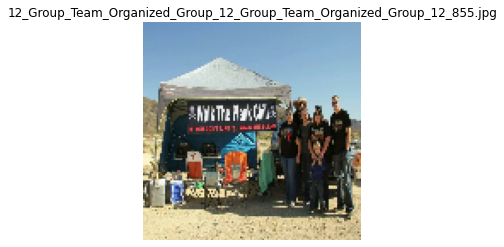

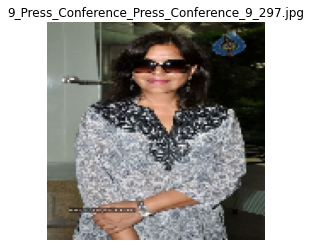

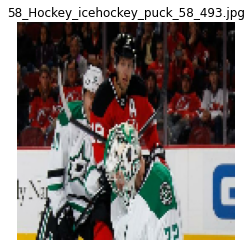

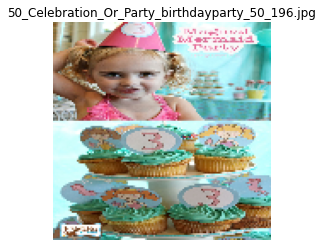

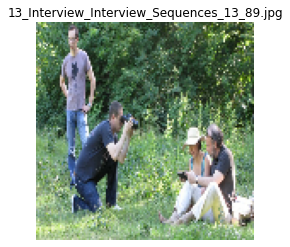

In [15]:
for image, label in images_ds.take(5):
    show(image, label)